MULTIPLE SOURCE TESTS:

This code is meant to compare the resolution obtained through the comsol simulations without simplification of the source geometry (in 2D), and my own code.

The BCs in the COMSOL code are given as:
$$
-\mathbf{n}\cdot (- \nabla \phi) = g_c - q_c \phi
$$
where the subscript $c$ is meant to denominate the COMSOL coefficients, the $\mathbf{n}$ is the normal vector pointing OUTSIDE of the domain.

Therefore, for our case where I commonly work in terms of $q$:
$$q_0=C_0(<C_v> - \bar{\phi})$$

and $$C_0 = K_{eff} \pi R_v^2$$

Therefore, if we consider an axisymmetric vessel:
$$
\dfrac{C_0}{2 \pi R_v D} (<C_v> - \bar{\phi}) = g_c - q_c \phi \quad at \quad \partial \Omega_\beta
$$

For simplicity, let's consider $q_c=g_c=1$
So 
$$
C_0=2 \pi R_v D
$$

In [1]:
import os
# insert at 1, 0 is the script path (or '' in REPL)
os.chdir('/home/pdavid//Bureau/Code/SS_auto57/2D_cartesian/SS_code/FV_metab')
import numpy as np 
import matplotlib.pyplot as plt
from module_2D_coupling_FV_nogrid import * 
import reconst_and_test_module as post
import random 
import scipy as sp
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6,6 ),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#0-Set up the sources
#1-Set up the domain
D=1
L=10
cells=5
h_ss=L/cells
#ratio=int(np.max((h_ss/0.1,6)))
ratio=12
#Rv=np.exp(-2*np.pi)*h_ss
Rv=L/50

C0=2*np.pi*Rv*D
K_eff=C0/(np.pi*Rv**2)

In [2]:
x_ss=np.linspace(h_ss/2, L-h_ss/2, int(np.around(L/h_ss)))
y_ss=x_ss
directness=int(cells/4)
print("directness=", directness)

directness= 1


In [3]:
array_of_sep=np.array([2.1,4,10,15,20])*Rv

print(0.9-array_of_sep/np.sqrt(2))

[ 0.60301515  0.33431458 -0.51421356 -1.22132034 -1.92842712]


In [4]:
array_of_sep=np.array([2.1,4,10,15,20])*Rv

array_of_pos=np.array([0.6,0.34,-0.52,-1.22,-1.93])+L/2 #position of the second source 
q_array_source=np.zeros((0,2))
p1=np.array([0.9,0.9])+L/2
for i in array_of_pos:
    p2=np.array([i,i])
    pos_s=np.array([p1,p2])
    print(pos_s-L/2)
    S=len(pos_s)
    t=assemble_SS_2D_FD(pos_s, Rv, h_ss,L, K_eff, D, directness)
    t.pos_arrays()
    t.initialize_matrices()
    M=t.assembly_sol_split_problem(np.array([0,0,0,0]))
    t.B[-S:]=np.ones(S)
    #t.B[-np.random.randint(0,S,int(S/2))]=0
    sol=np.linalg.solve(M, t.B)
    phi_FV=sol[:-S].reshape(len(t.x), len(t.y))
    phi_q=sol[-S:]
    
    q_array_source=np.concatenate((q_array_source, np.array([phi_q])), axis=0)

[[0.9 0.9]
 [0.6 0.6]]
[[0.9  0.9 ]
 [0.34 0.34]]
[[ 0.9   0.9 ]
 [-0.52 -0.52]]
[[ 0.9   0.9 ]
 [-1.22 -1.22]]
[[ 0.9   0.9 ]
 [-1.93 -1.93]]


In [5]:
pos_s

array([[5.9 , 5.9 ],
       [3.07, 3.07]])

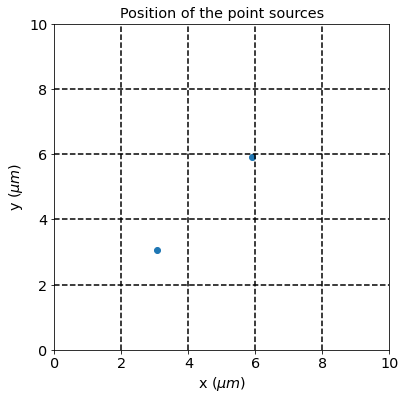

In [6]:

vline=(y_ss[1:]+x_ss[:-1])/2
plt.scatter(pos_s[:,0], pos_s[:,1])
plt.title("Position of the point sources")
for xc in vline:
    plt.axvline(x=xc, color='k', linestyle='--')
for xc in vline:
    plt.axhline(y=xc, color='k', linestyle='--')
plt.xlim([0,L])
plt.ylim([0,L])
plt.ylabel("y ($\mu m$)")
plt.xlabel("x ($\mu m$)")
plt.show()


In [7]:
q_COMSOL_sources=np.array([1.145,1.2336,1.3547,1.415,1.4675])


In [8]:
q_array_sink=np.zeros((0,2))
for i in array_of_pos:
    p2=np.array([i,i])
    pos_s=np.array([p1,p2])
    print(pos_s-L/2)
    S=len(pos_s)
    t=assemble_SS_2D_FD(pos_s, Rv, h_ss,L, K_eff, D, directness)
    t.pos_arrays()
    t.initialize_matrices()
    M=t.assembly_sol_split_problem(np.array([0,0,0,0]))
    t.B[-S:]=np.ones(S)
    t.B[-1]= 0
    #t.B[-np.random.randint(0,S,int(S/2))]=0
    sol=np.linalg.solve(M, t.B)
    phi_FV=sol[:-S].reshape(len(t.x), len(t.y))
    phi_q=sol[-S:]
    
    q_array_sink=np.concatenate((q_array_sink, np.array([phi_q])), axis=0)

[[0.9 0.9]
 [0.6 0.6]]
[[0.9  0.9 ]
 [0.34 0.34]]
[[ 0.9   0.9 ]
 [-0.52 -0.52]]
[[ 0.9   0.9 ]
 [-1.22 -1.22]]
[[ 0.9   0.9 ]
 [-1.93 -1.93]]


In [9]:
q_array_sink

array([[ 0.83491007, -0.25743052],
       [ 0.79901558, -0.1863977 ],
       [ 0.76682294, -0.09310185],
       [ 0.76052923, -0.0671539 ],
       [ 0.75709475, -0.04055921]])

In [12]:
q_COMSOL_sink=np.array([[0.8221,-0.2474],
                        [0.8018,-0.1821],
                       [0.7752,-0.0951],
                       [0.7687,-0.062],
                       [0.7658,-0.0399]])

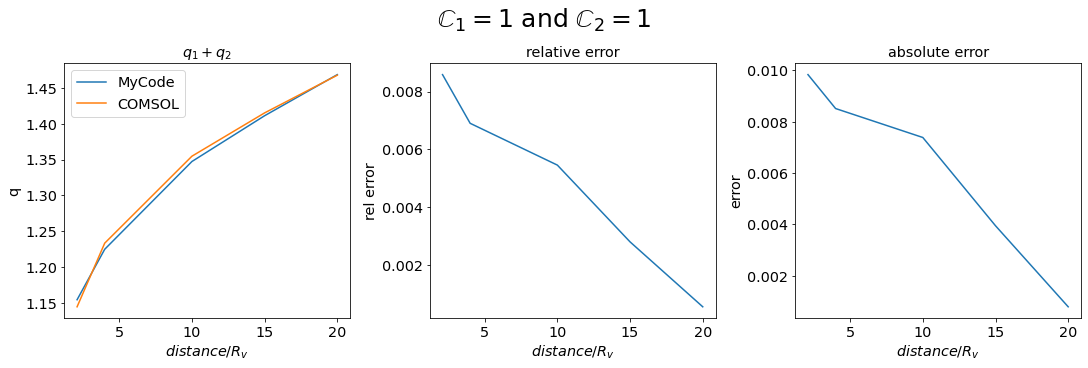

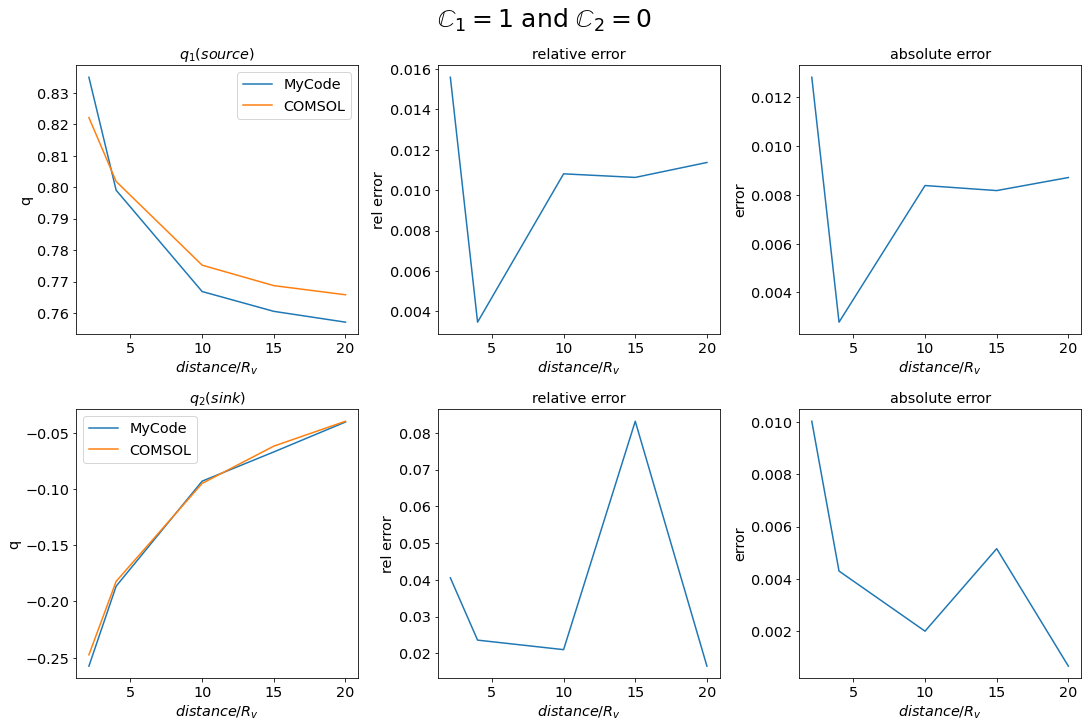

In [13]:
array_code=np.sum(q_array_source, axis=1)
array_COMSOL=q_COMSOL_sources


fig, axs = plt.subplots(1,3, figsize=(15,5),constrained_layout=True)
fig.suptitle("$\mathbb{C}_1 = 1$ and $\mathbb{C}_2 = 1$", fontsize=25)
c=axs[0].plot(array_of_sep/Rv, array_code, label='MyCode')
axs[0].plot(array_of_sep/Rv, array_COMSOL, label='COMSOL')
axs[0].legend()
axs[0].set_xlabel("$distance/R_v$")
axs[0].set_ylabel("q")
axs[0].set_title("$q_1+q_2$")

b=axs[1].plot(array_of_sep/Rv,np.abs(array_code-array_COMSOL)/array_COMSOL)
axs[1].set_xlabel("$distance/R_v$")
axs[1].set_ylabel("rel error")
axs[1].set_title("relative error")


axs[2].plot(array_of_sep/Rv,np.abs(array_code-array_COMSOL))
axs[2].set_ylabel("error")
axs[2].set_xlabel("$distance/R_v$")
axs[2].set_title("absolute error")

plt.show()

array_code=q_array_sink[:,0]
array_COMSOL=q_COMSOL_sink[:,0]


fig, axs = plt.subplots(2,3, figsize=(15,10),constrained_layout=True)
fig.suptitle("$\mathbb{C}_1 = 1$ and $\mathbb{C}_2 = 0$", fontsize=25)
axs[0,0].plot(array_of_sep/Rv, array_code, label='MyCode')
axs[0,0].plot(array_of_sep/Rv, array_COMSOL, label='COMSOL')
axs[0,0].legend()
axs[0,0].set_xlabel("$distance/R_v$")
axs[0,0].set_ylabel("q")
axs[0,0].set_title("$q_1 (source)$")

axs[0,1].plot(array_of_sep/Rv,np.abs(array_code-array_COMSOL)/array_COMSOL)
axs[0,1].set_xlabel("$distance/R_v$")
axs[0,1].set_ylabel("rel error")
axs[0,1].set_title("relative error")


axs[0,2].plot(array_of_sep/Rv,np.abs(array_code-array_COMSOL))
axs[0,2].set_ylabel("error")
axs[0,2].set_xlabel("$distance/R_v$")
axs[0,2].set_title("absolute error")

array_code=q_array_sink[:,1]
array_COMSOL=q_COMSOL_sink[:,1]

axs[1,0].plot(array_of_sep/Rv, array_code, label='MyCode')
axs[1,0].plot(array_of_sep/Rv, array_COMSOL, label='COMSOL')
axs[1,0].legend()
axs[1,0].set_xlabel("$distance/R_v$")
axs[1,0].set_ylabel("q")
axs[1,0].set_title("$q_2 (sink)$")

axs[1,1].plot(array_of_sep/Rv,np.abs(array_code-array_COMSOL)/np.abs(array_COMSOL))
axs[1,1].set_xlabel("$distance/R_v$")
axs[1,1].set_ylabel("rel error")
axs[1,1].set_title("relative error")


axs[1,2].plot(array_of_sep/Rv,np.abs(array_code-array_COMSOL))
axs[1,2].set_ylabel("error")
axs[1,2].set_xlabel("$distance/R_v$")
axs[1,2].set_title("absolute error")
plt.show()

Text(0.5, 1.0, 'Relative error source')

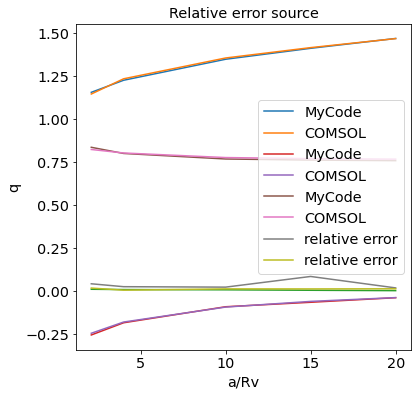

In [14]:
plt.plot(array_of_sep/Rv, np.sum(q_array_source, axis=1), label='MyCode')
plt.plot(array_of_sep/Rv, q_COMSOL_sources, label='COMSOL')
plt.legend()
plt.xlabel("a/Rv")
plt.ylabel("q")
plt.title("Comparison for the source")

plt.plot(array_of_sep/Rv,np.abs(np.sum(q_array_source, axis=1)-q_COMSOL_sources)/q_COMSOL_sources)
plt.legend()
plt.xlabel("a/Rv")
plt.ylabel("rel error")

plt.plot(array_of_sep/Rv,q_array_sink[:,1], label='MyCode')
plt.plot(array_of_sep/Rv,q_COMSOL_sink[:,1], label='COMSOL')
plt.legend()
plt.xlabel("a/Rv")
plt.ylabel("q")
plt.title("Comparison for the sink")

plt.plot(array_of_sep/Rv,q_array_sink[:,0], label='MyCode')
plt.plot(array_of_sep/Rv,q_COMSOL_sink[:,0], label='COMSOL')
plt.xlabel("a/Rv")
plt.ylabel("q")
#plt.ylim((0.4,0.5))
plt.legend()
plt.title("Comarison for the source")

plt.plot(array_of_sep/Rv,np.abs(q_array_sink[:,1]-q_COMSOL_sink[:,1])/np.abs(q_COMSOL_sink[:,1]), label='relative error')
plt.legend()
plt.title("Relative error sink")

plt.plot(array_of_sep/Rv,np.abs(q_array_sink[:,0]-q_COMSOL_sink[:,0])/q_COMSOL_sink[:,0], label='relative error')
plt.legend()
plt.title("Relative error source")
